In [1]:
import os
import sys
from collections import defaultdict

import nibabel
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
%%bash
rm -rf ./nifti_scratch
mkdir ./nifti_scratch
unzip /mnt/ml4cvd/projects/bulk/brain_mri/1001278_20251_2_0.zip -d ./nifti_scratch/

Archive:  /mnt/ml4cvd/projects/bulk/brain_mri/1001278_20251_2_0.zip
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG.json  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG_TE2.json  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_PHA.json  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_PHA_TE2.json  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG_orig.nii.gz  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG_TE2_orig.nii.gz  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG.nii.gz  
  inflating: ./nifti_scratch/SWI/SWI_to_T1.mat  
  inflating: ./nifti_scratch/SWI/SWI_TOTAL_MAG_to_T1.nii.gz  
  inflating: ./nifti_scratch/SWI/T1_to_SWI.mat  
  inflating: ./nifti_scratch/SWI/brain_mask.nii.gz  
  inflating: ./nifti_scratch/SWI/T2star_to_T1.nii.gz  
  inflating: ./nifti_scratch/SWI/T2star.nii.gz  
  inflating: ./nifti_scratch/SWI/SOS_TE1.nii.gz  
  inflating: ./nifti_scratch/SWI/SOS_TE2.nii.gz  
  inflating: ./nifti_scratch/SWI/filtered_phase.nii.gz  
  inflating: ./nifti_scratch/SWI/SWI.nii.gz  



SWI_TOTAL_MAG_orig.nii.gz
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 288, 48)
affine: 
[[ 7.97076643e-01 -4.93102372e-02  1.54787758e-02 -9.31579666e+01]
 [ 4.83658426e-02  7.62343884e-01 -8.75133753e-01 -1.23886009e+02]
 [ 1.04509732e-02  2.32765958e-01  2.86947489e+00 -1.48755005e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 256 288  48   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7986111 0.7986111 2.9999976 0.027     0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyz


SWI_TOTAL_MAG.nii.gz
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 288, 48)
affine: 
[[ 7.97076643e-01 -4.93102372e-02  1.54787758e-02 -9.31579666e+01]
 [ 4.83658426e-02  7.62343884e-01 -8.75133753e-01 -1.23886009e+02]
 [ 1.04509732e-02  2.32765958e-01  2.86947489e+00 -1.48755005e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 288  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7986111 0.7986111 2.9999976 0.027     0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_unit


SOS_TE1.nii.gz
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 288, 48)
affine: 
[[ 7.97076643e-01 -4.93102372e-02  1.54787758e-02 -9.31579666e+01]
 [ 4.83658426e-02  7.62343884e-01 -8.75133753e-01 -1.23886009e+02]
 [ 1.04509732e-02  2.32765958e-01  2.86947489e+00 -1.48755005e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 288  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.7986111 0.7986111 2.9999976 0.027     0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units   

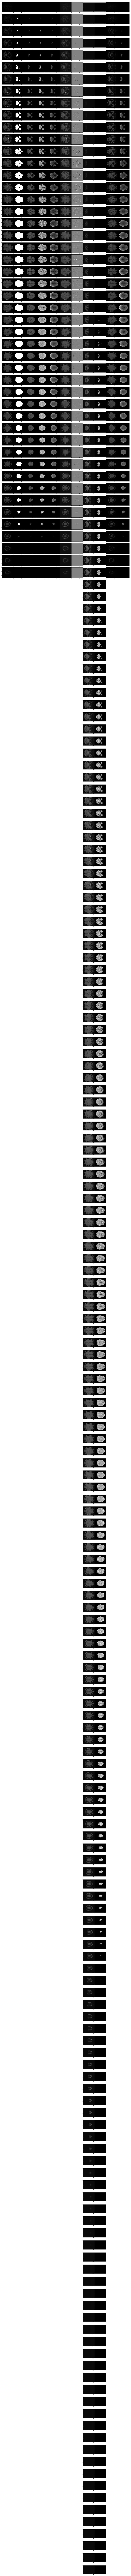

In [3]:
nii_dir = './nifti_scratch/SWI/'
nrow = 214
ncol = 11
counter = 0
fig = plt.figure(figsize=(ncol, nrow)) 
gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0) 

for nii_file in os.listdir(nii_dir):
    if not nii_file.endswith('.nii.gz'):
        continue
    try:
        nifti_mri = nibabel.load(nii_dir + nii_file)
    except:
        pass
    print('\n' + nii_file)
    print(nifti_mri)
    nifti_array = nifti_mri.get_fdata()
    print(nifti_array.shape)
    
    for i in range(nrow):
        if i >= nifti_array.shape[-1]:
            continue
        ax = plt.subplot(gs[i, counter])
        ax.imshow(nifti_array[..., i], cmap='gray', vmin=np.min(nifti_array), vmax=np.max(nifti_array))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    counter += 1
        
    

In [4]:
def plot_nifti_array(nifti_array, slices, name):
    sides = int(np.ceil(np.sqrt(slices)))
    fig = plt.figure(figsize=(sides*2, sides*2)) 
    gs = gridspec.GridSpec(sides, sides, wspace=0.0, hspace=0.0) 
    vmin = np.min(nifti_array)
    vmax = np.max(nifti_array)
    print(f'Nifti name:{name} shape:{nifti_array.shape} min: {vmin} max: {vmax}')
    for i in range(nifti_array.shape[-1]):
        ax = plt.subplot(gs[i//sides, i%sides])
        ax.imshow(nifti_array[..., i], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

Nifti name:SWI_TOTAL_MAG_orig.nii.gz shape:(256, 288, 48) min: 0.0 max: 1451.0
Nifti name:brain_mask.nii.gz shape:(256, 288, 48) min: 0.0 max: 1.0
Nifti name:SWI.nii.gz shape:(256, 288, 48) min: 0.0 max: 940.0223999023438
Nifti name:T2star.nii.gz shape:(256, 288, 48) min: 0.0 max: 77.69670867919922
Nifti name:SOS_TE2.nii.gz shape:(256, 288, 48) min: 0.0 max: 682.150146484375
Nifti name:SWI_TOTAL_MAG.nii.gz shape:(256, 288, 48) min: -89.0 max: 1443.0
Nifti name:filtered_phase.nii.gz shape:(256, 288, 48) min: -3.1019461154937744 max: 2.9347569942474365
Nifti name:SWI_TOTAL_MAG_to_T1.nii.gz shape:(168, 221, 214) min: -47.0 max: 1199.0
Nifti name:T2star_to_T1.nii.gz shape:(168, 221, 214) min: 0.0 max: 74.3275146484375
Nifti name:SWI_TOTAL_MAG_TE2_orig.nii.gz shape:(256, 288, 48) min: 0.0 max: 1164.0
Nifti name:SOS_TE1.nii.gz shape:(256, 288, 48) min: 0.0 max: 834.03271484375


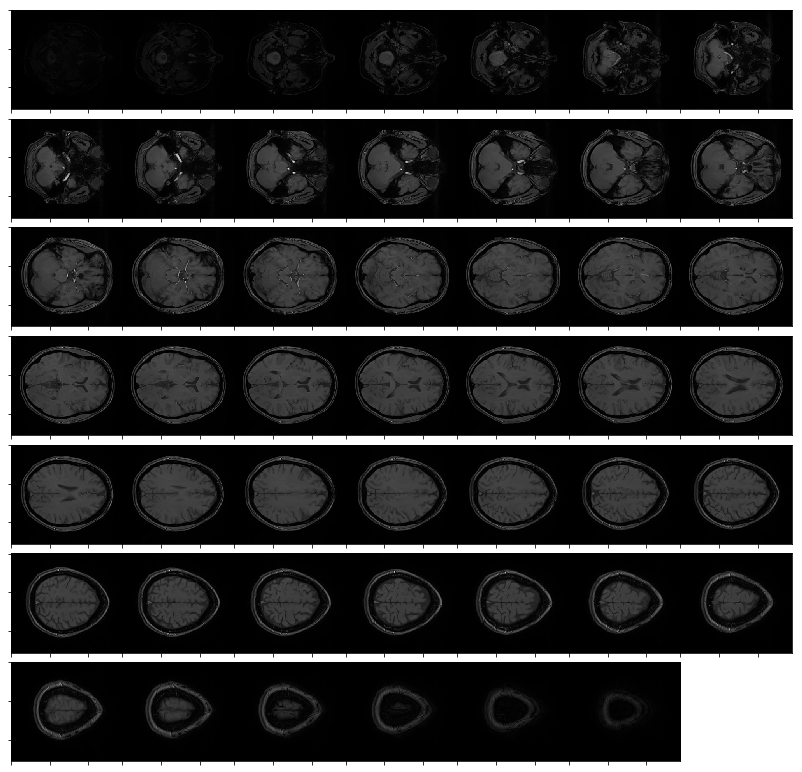

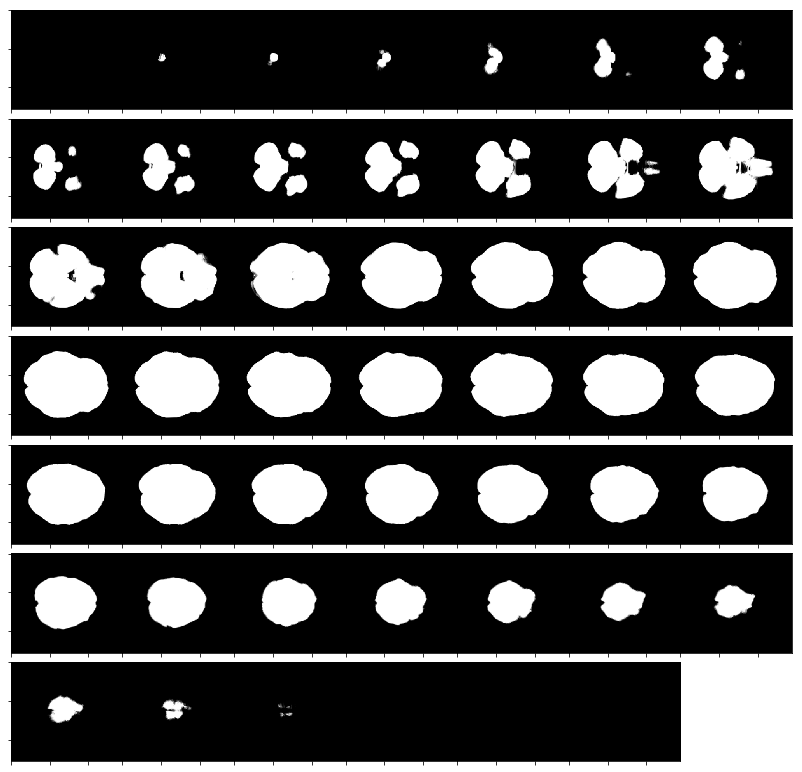

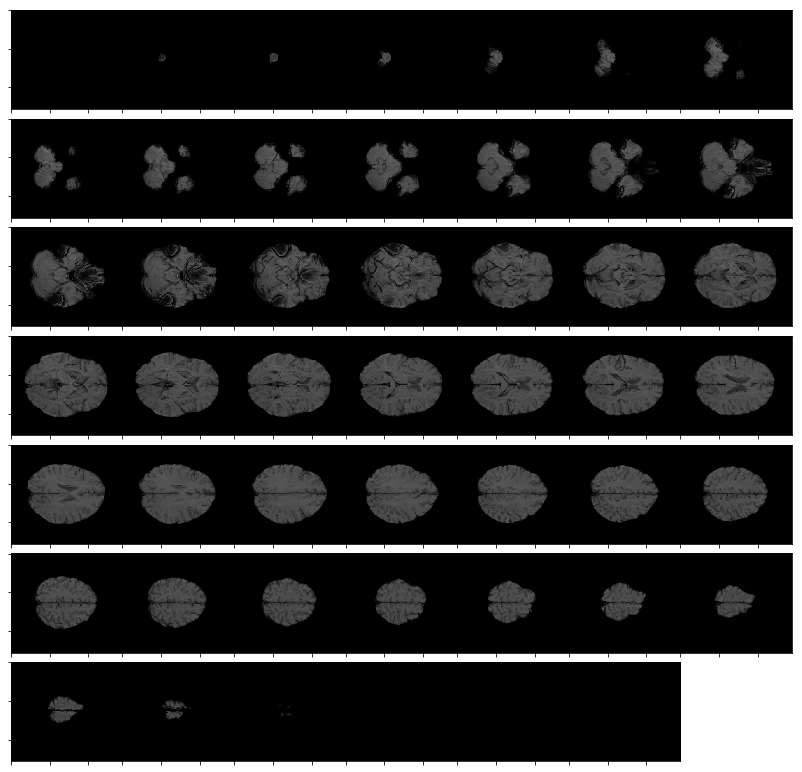

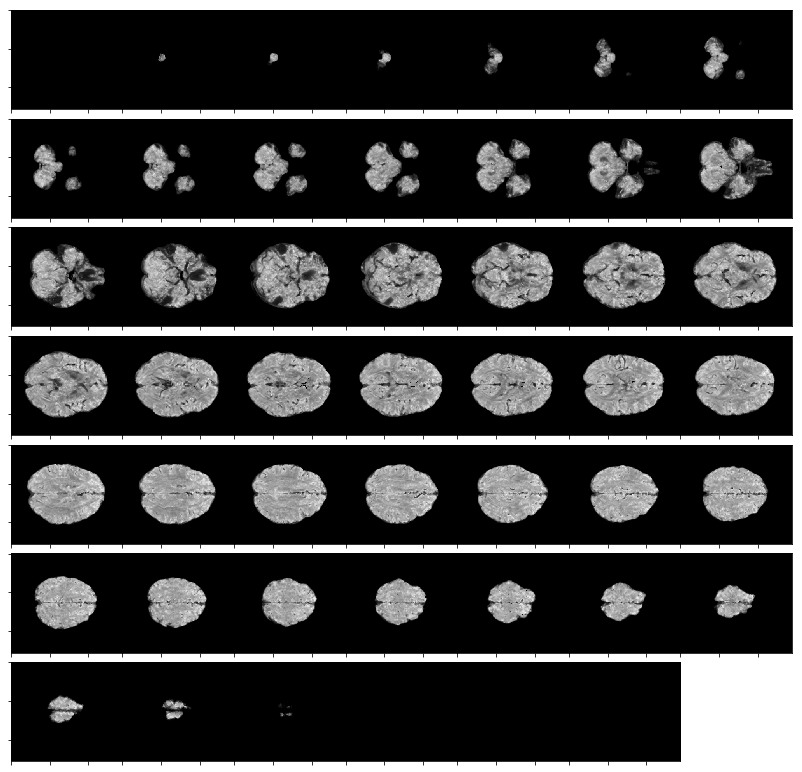

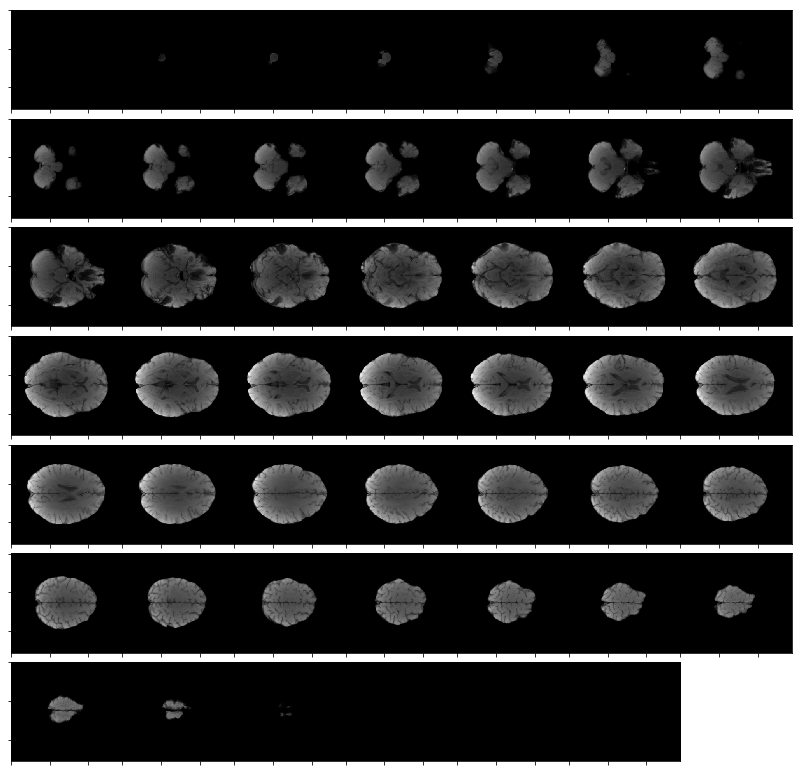

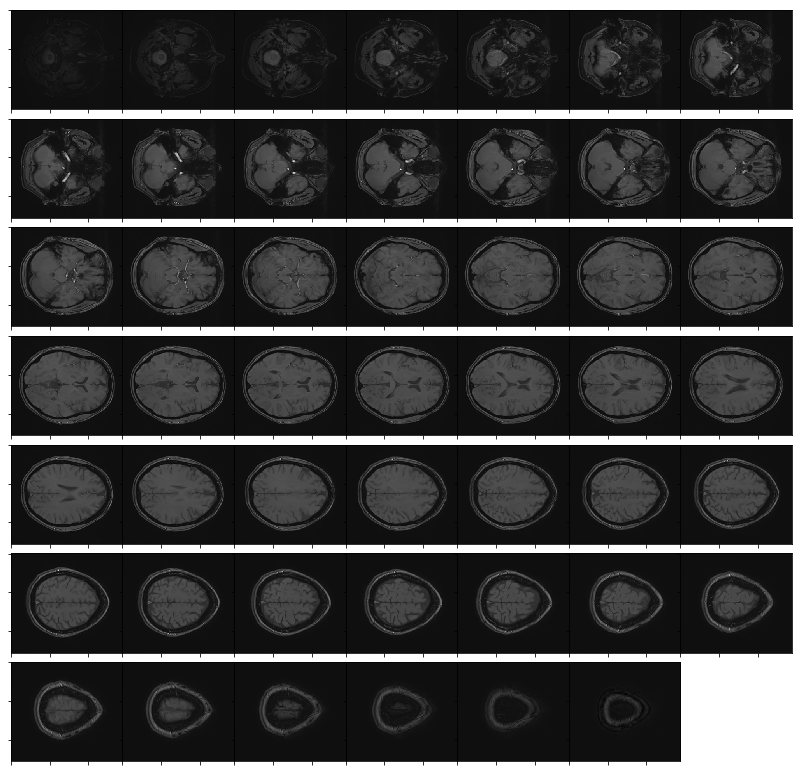

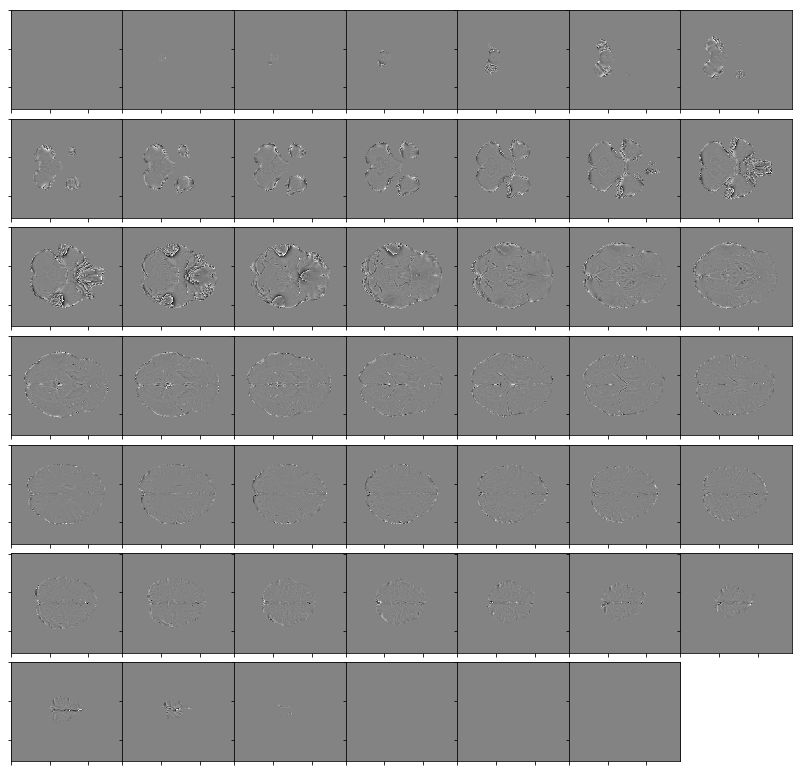

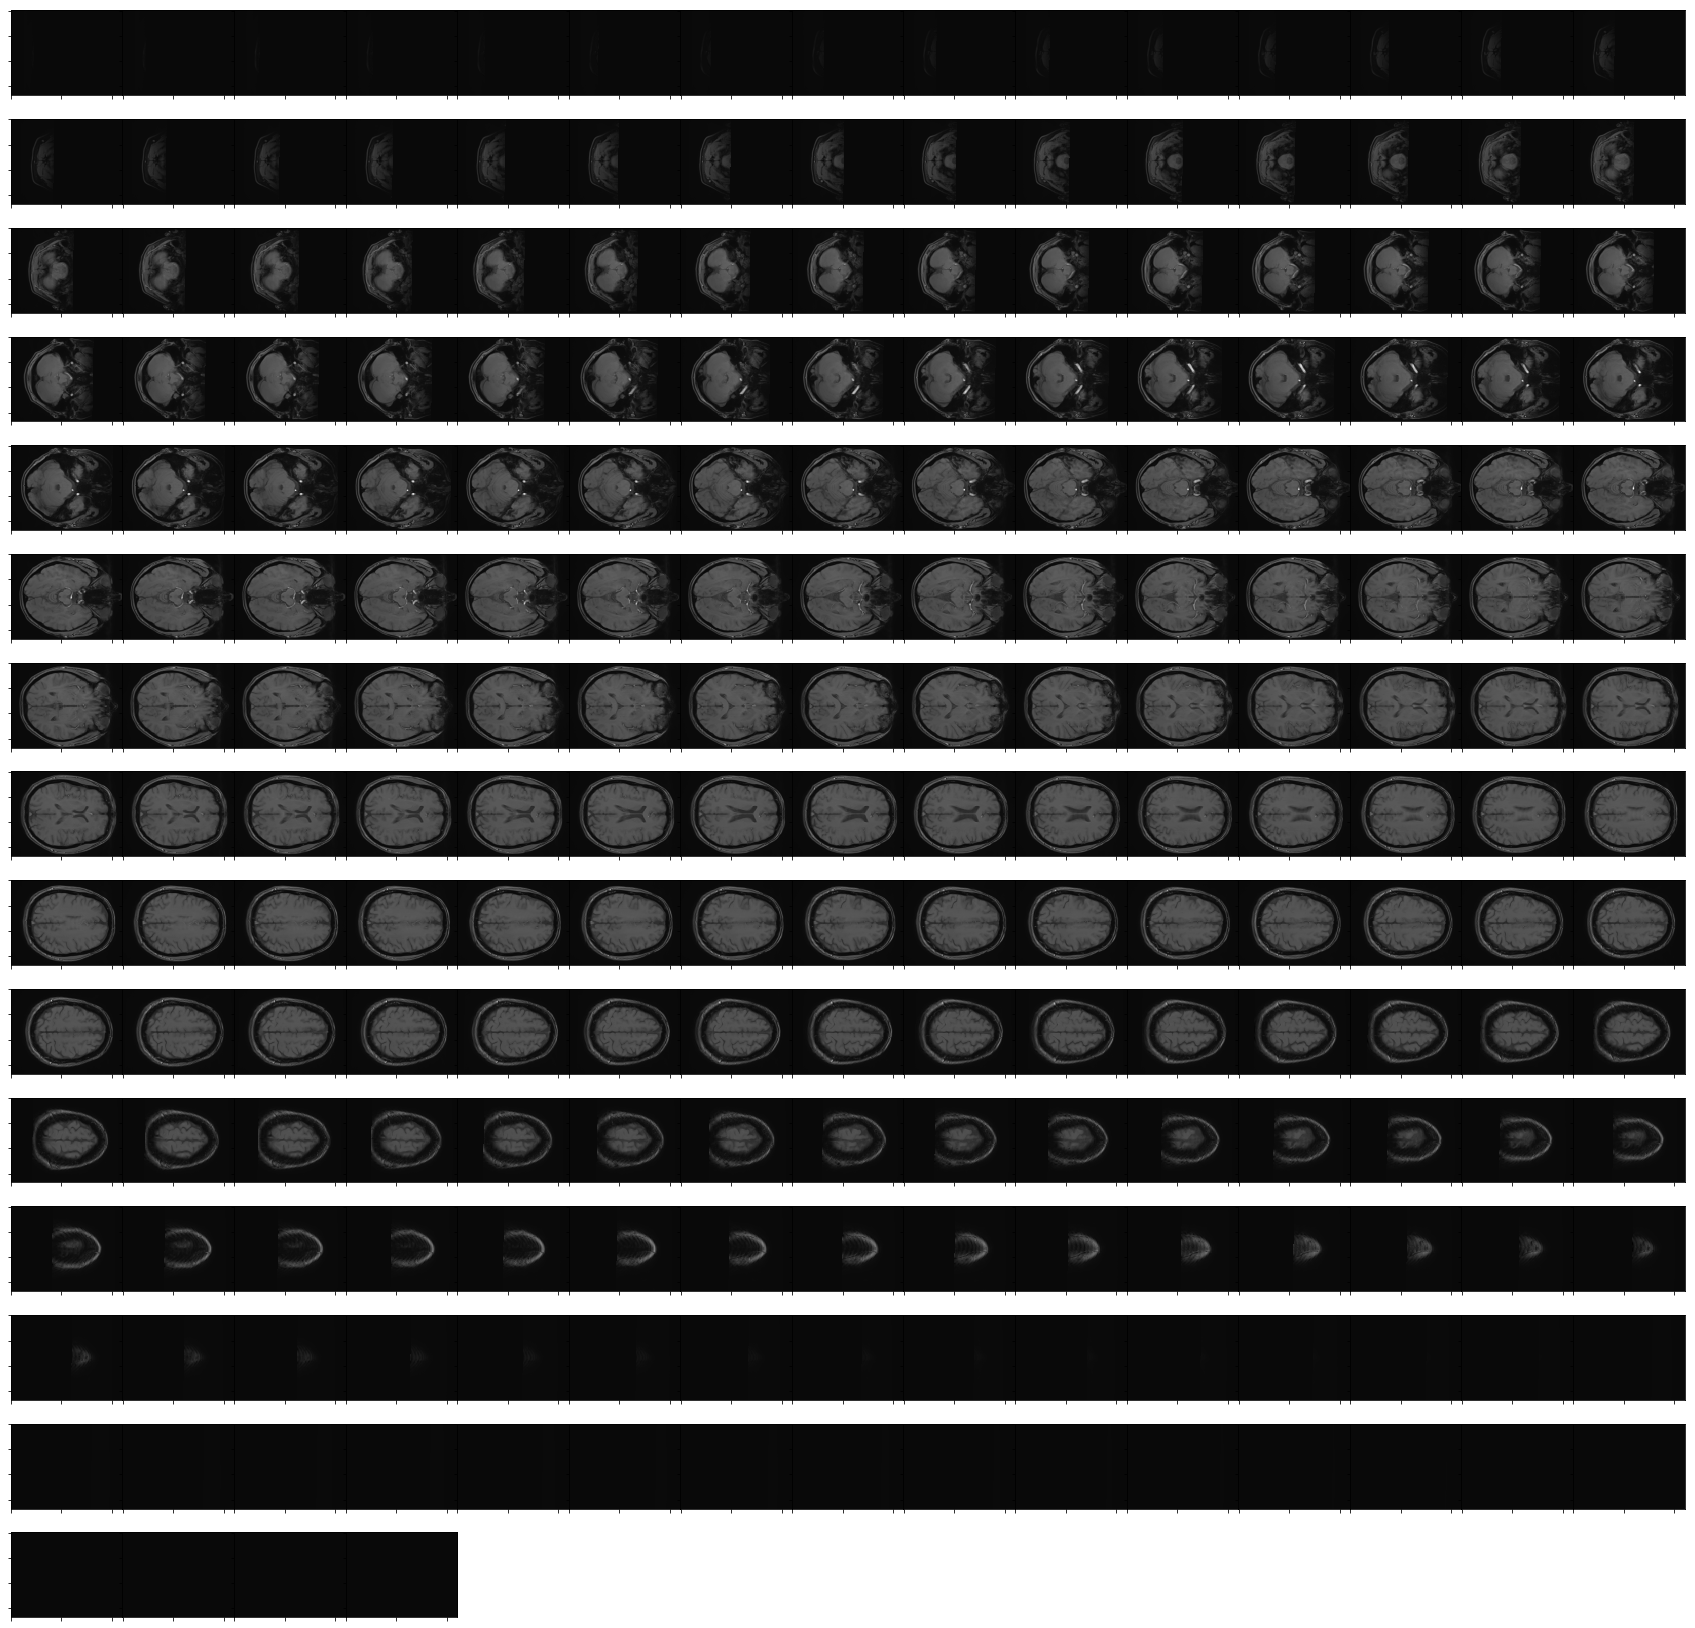

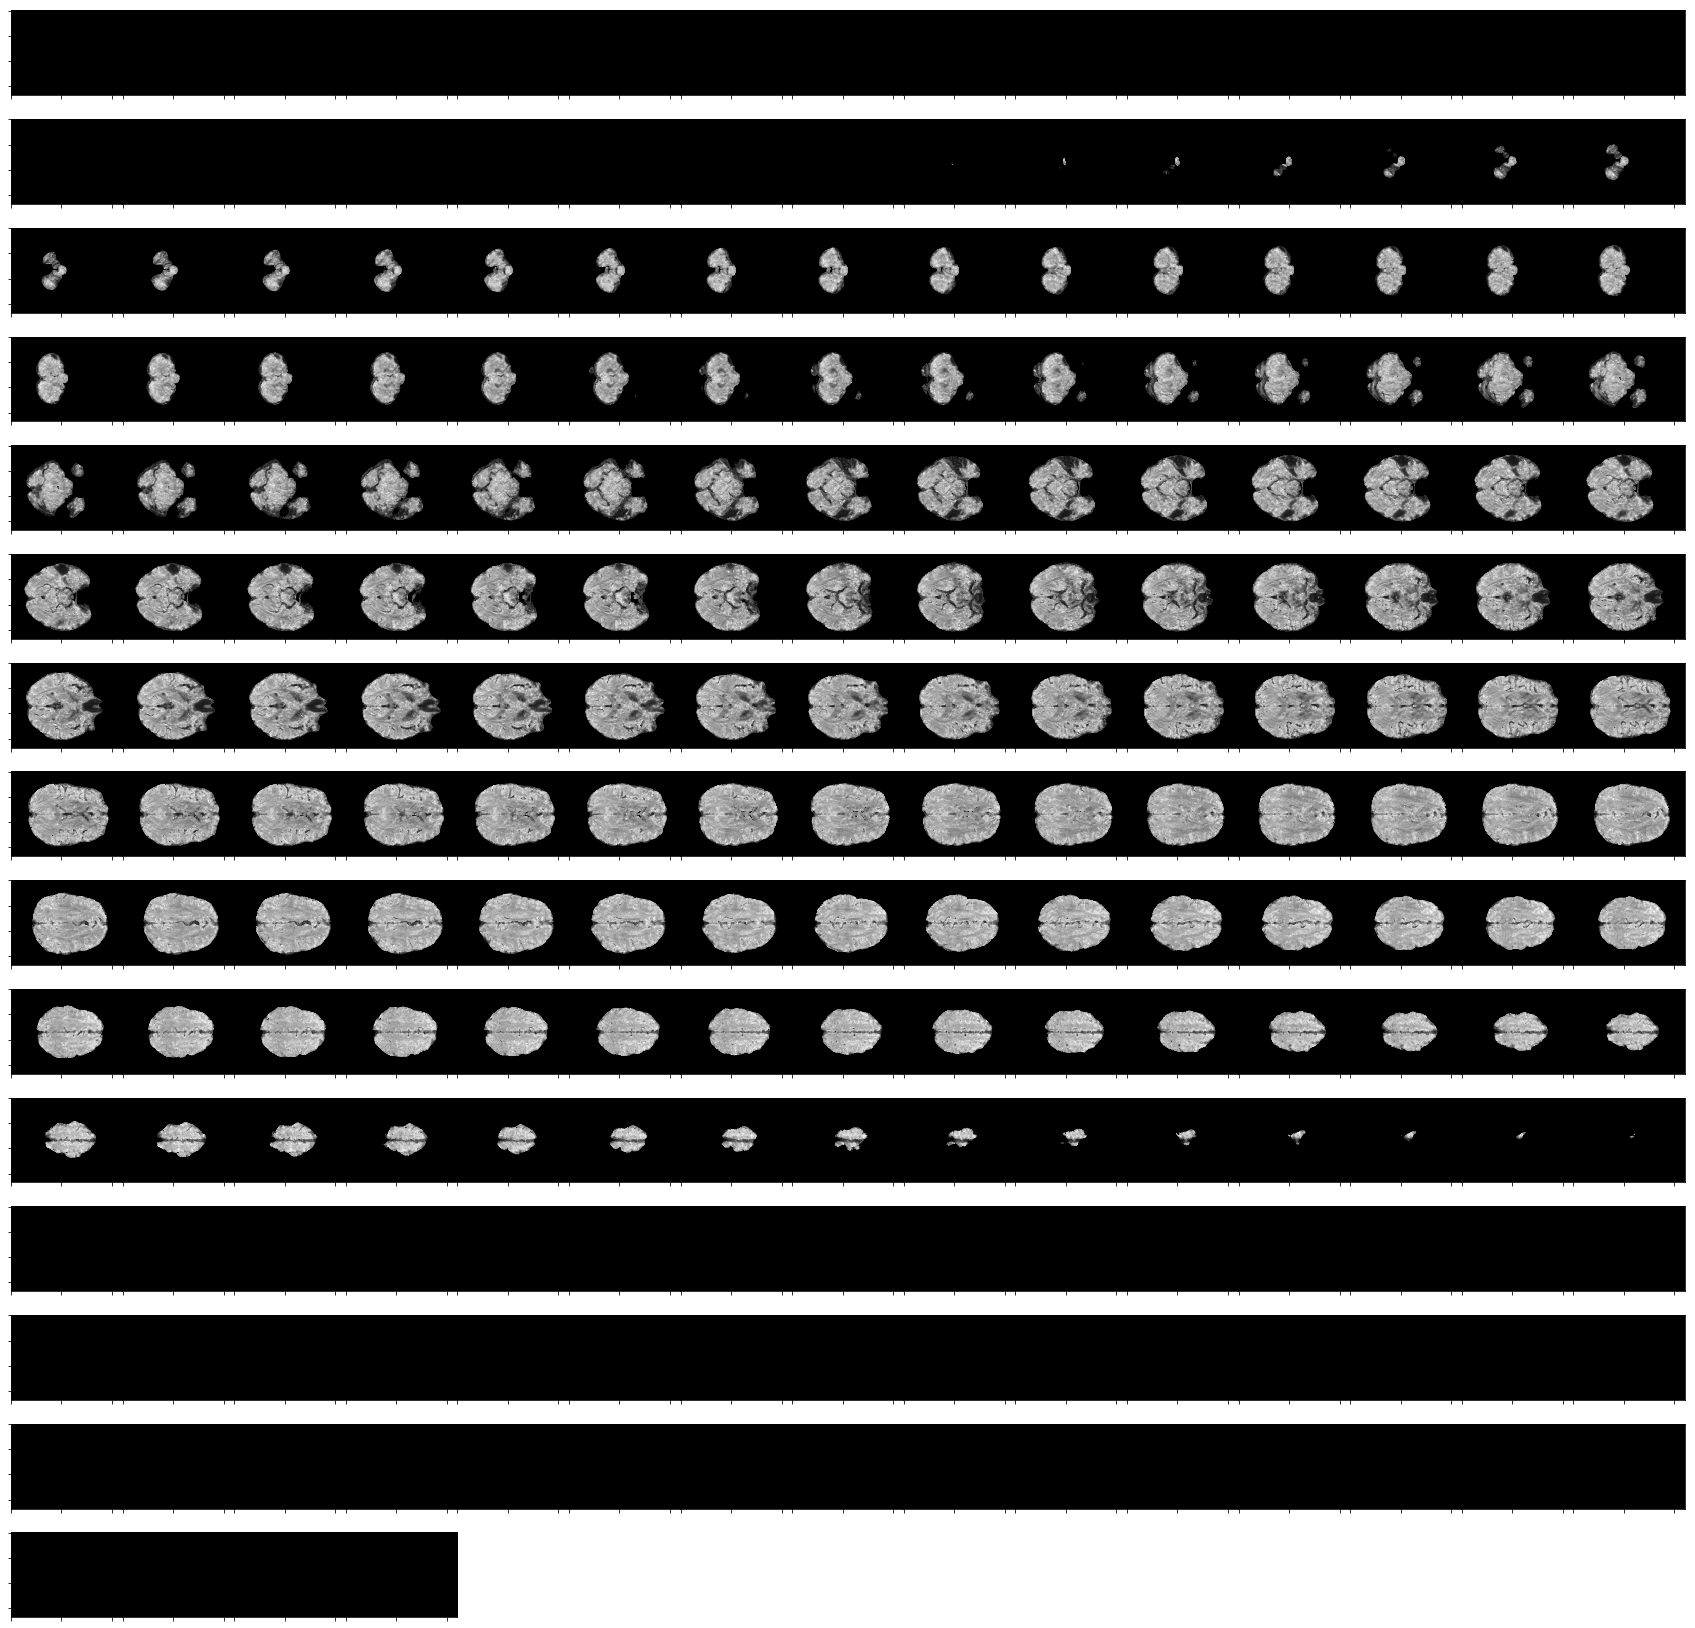

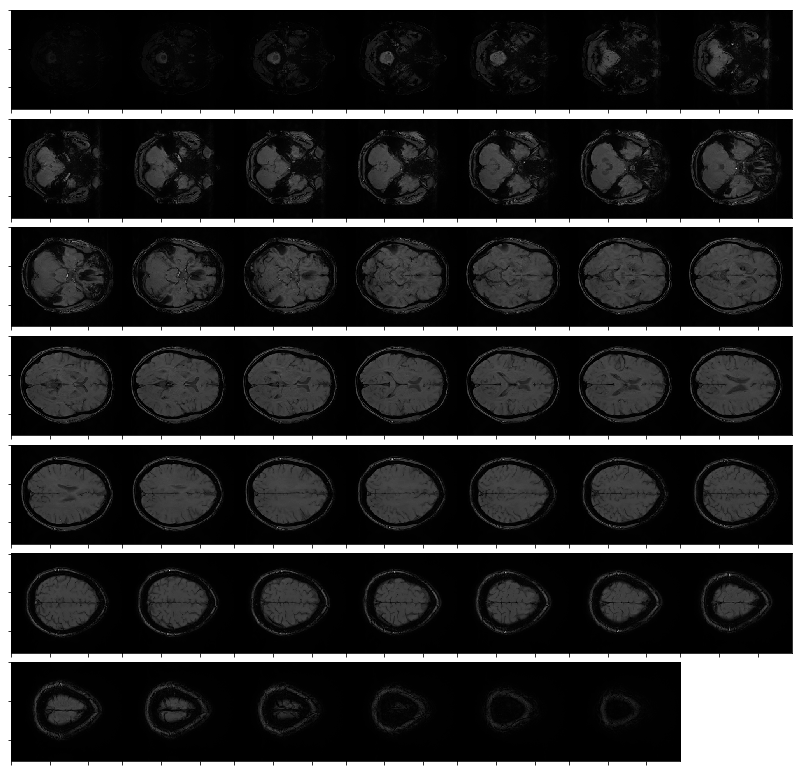

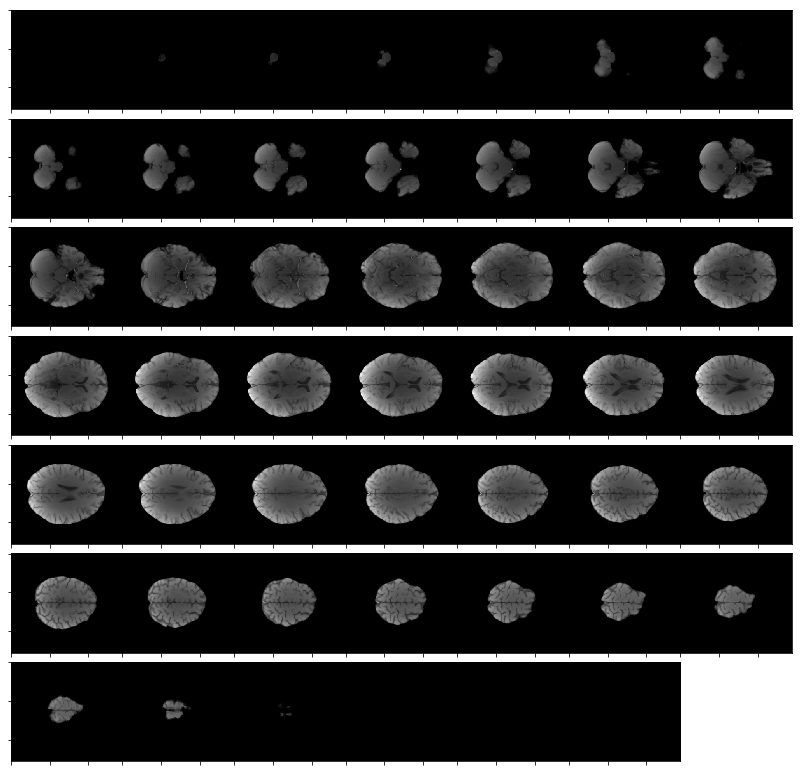

In [5]:
for nii_file in os.listdir(nii_dir):
    if not nii_file.endswith('.nii.gz'):
        continue
    nifti_mri = nibabel.load(nii_dir + nii_file)
    nifti_array = nifti_mri.get_fdata()
    plot_nifti_array(nifti_array, nifti_array.shape[-1], nii_file)